## LR Classifier reliability with proba

In [1]:
import joblib
import pandas as pd
import numpy as np
from utils.reliability_visualizer import ReliabilityVisualizer

In [2]:
###########################################################
# Load Classifier and Training Data
###########################################################
pipeline = joblib.load('pipeline_classifier.pkl')
training_data = pd.read_csv("dataset/data_train.csv")

y_train = training_data['SOURCE'].map({'out': 0, 'in': 1})
X_train = training_data.drop(columns=['SOURCE'])

X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)

In [3]:
###########################################################
# Reliability Calculation with Logistic Regression
###########################################################

def classify_and_check_reliability_logistic(new_data, pipeline):
    """
    Predicts the class and calculates reliability using Logistic Regression probabilities.

    Parameters:
    - new_data (pd.DataFrame): DataFrame with the same columns as training data.
    - pipeline (Pipeline): The loaded pipeline for preprocessing and classification.
    Returns:
    - dict: Contains prediction and reliability score.
    """
    predicted_label = pipeline.predict(new_data)[0]

    reliability_score = max(pipeline.predict_proba(new_data)[0])

    return {
        "predicted_label": predicted_label,
        "reliability_score": reliability_score
    }

In [4]:
###########################################################
# Load Validation Data and Test
###########################################################
validation_data = pd.read_csv("dataset/data_validation.csv")
validation_data['SOURCE'] = validation_data['SOURCE'].map({'out': 0, 'in': 1})
results = []

for _, instance in validation_data.iterrows():
    true_label = instance['SOURCE']
    instance_df = pd.DataFrame([instance.drop(labels=['SOURCE'])])
    result = classify_and_check_reliability_logistic(
        instance_df, pipeline
    )
    result['true_label'] = true_label
    results.append(result)

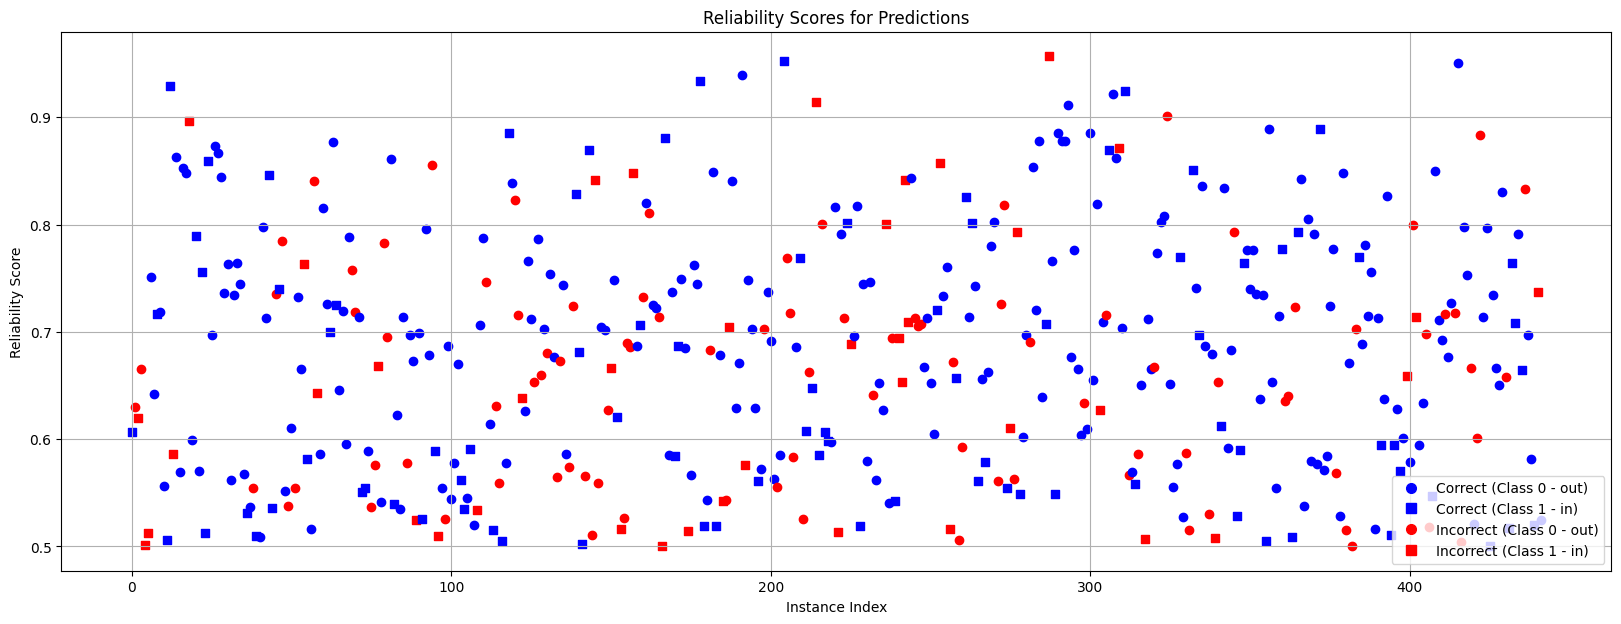

In [5]:
###########################################################
# Results and Visualization
###########################################################
results_df = pd.DataFrame(results)

visualizer = ReliabilityVisualizer(results_df=results_df)
visualizer.plot_reliability_scores((20, 7))

### 10

In [6]:
reliability_table_10_df = visualizer.get_reliability_table_10()
print(reliability_table_10_df)

    Reliability  Correct (0)  Incorrect (0)  Correct (1)  Incorrect (1)
0  [0.00, 0.10]            0              0            0              0
1  ]0.10, 0.20]            0              0            0              0
2  ]0.20, 0.30]            0              0            0              0
3  ]0.30, 0.40]            0              0            0              0
4  ]0.40, 0.50]            0              0            0              0
5  ]0.50, 0.60]           50             32           43             15
6  ]0.60, 0.70]           58             26           12             11
7  ]0.70, 0.80]           74             25           16              6
8  ]0.80, 0.90]           36              8           12              7
9  ]0.90, 1.00]            4              1            4              2


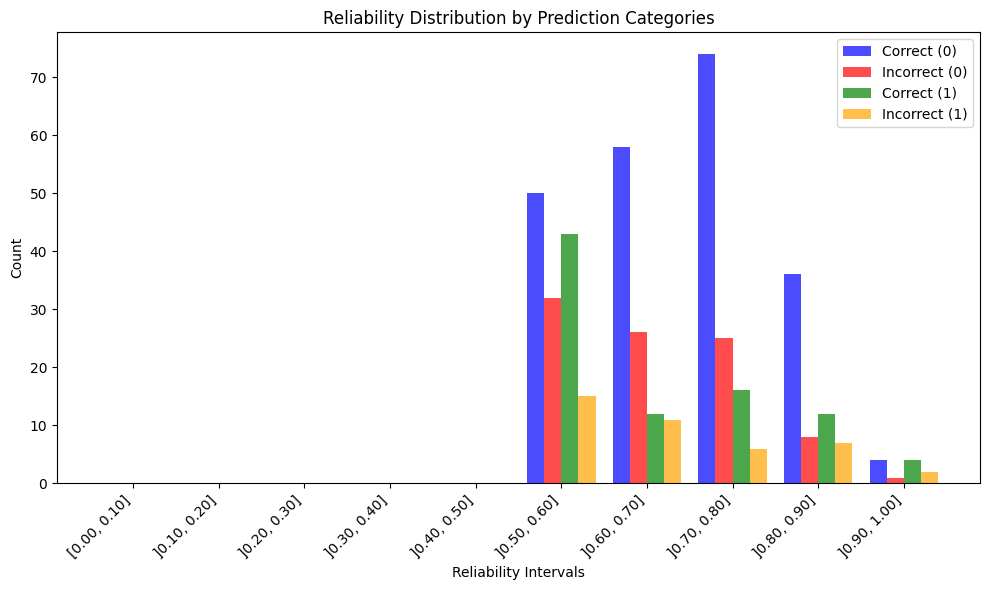

In [7]:
visualizer.plot_table_graph(reliability_table_10_df)

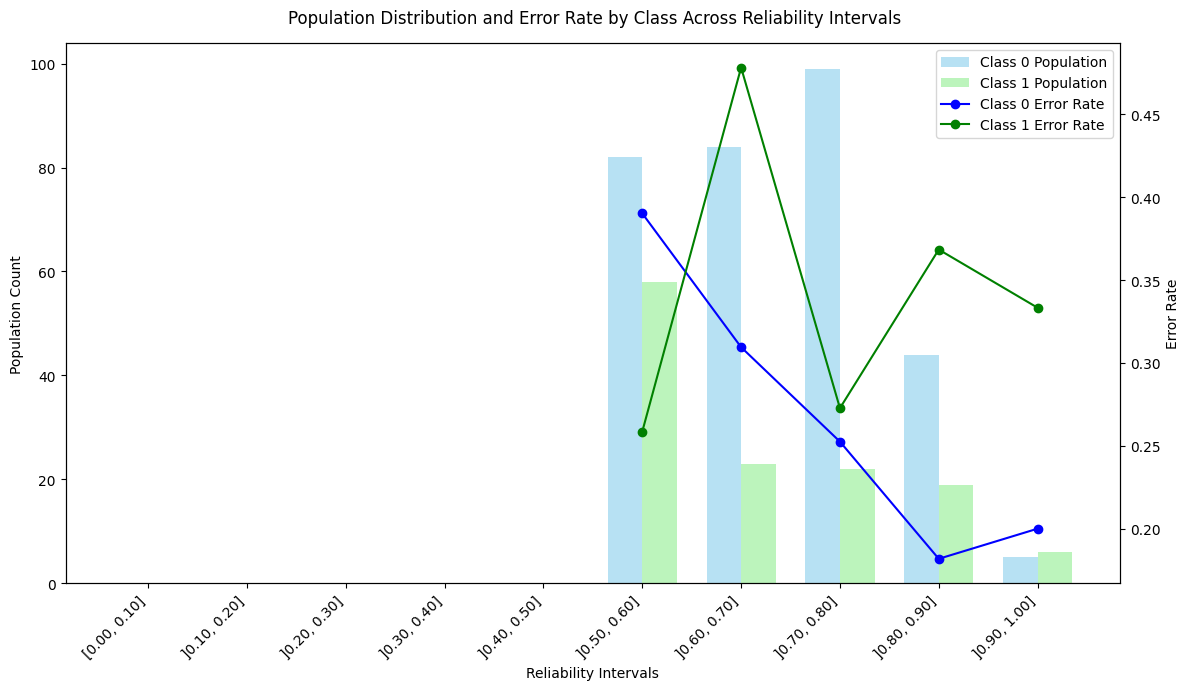

In [8]:
visualizer.plot_population_and_error_rate_by_class(reliability_table_10_df)


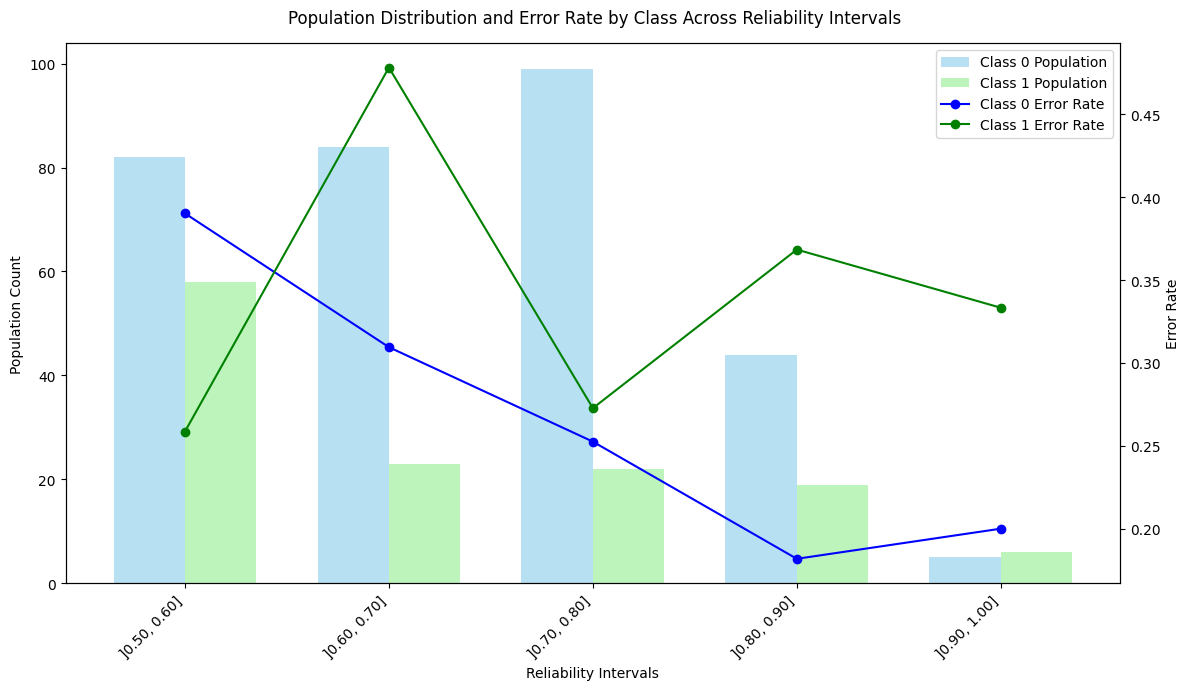

In [9]:
visualizer.plot_population_and_error_rate_by_class_maior_50(reliability_table_10_df)